In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = 'data'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

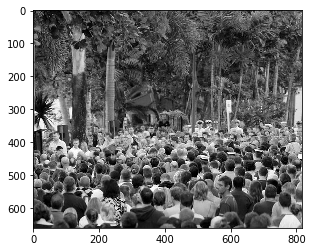

In [10]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[100]))

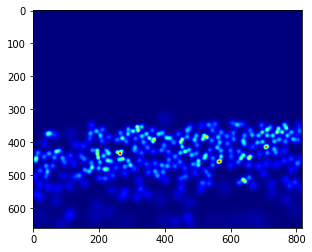

In [11]:
gt_file = h5py.File(img_paths[100].replace('.jpg','.h5').replace('images','ground'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [12]:
np.sum(groundtruth)# don't mind this slight variation

270.32568

In [13]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [12]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

data/part_B_final/train_data/images/IMG_73.jpg
data/part_B_final/train_data/images/IMG_372.jpg
data/part_B_final/train_data/images/IMG_237.jpg
data/part_B_final/train_data/images/IMG_315.jpg
data/part_B_final/train_data/images/IMG_229.jpg
data/part_B_final/train_data/images/IMG_40.jpg
data/part_B_final/train_data/images/IMG_279.jpg
data/part_B_final/train_data/images/IMG_101.jpg
data/part_B_final/train_data/images/IMG_179.jpg
data/part_B_final/train_data/images/IMG_46.jpg
data/part_B_final/train_data/images/IMG_252.jpg
data/part_B_final/train_data/images/IMG_375.jpg
data/part_B_final/train_data/images/IMG_42.jpg
data/part_B_final/train_data/images/IMG_138.jpg
data/part_B_final/train_data/images/IMG_304.jpg
data/part_B_final/train_data/images/IMG_354.jpg
data/part_B_final/train_data/images/IMG_391.jpg
data/part_B_final/train_data/images/IMG_357.jpg
data/part_B_final/train_data/images/IMG_43.jpg
data/part_B_final/train_data/images/IMG_165.jpg
data/part_B_final/train_data/images/IMG_78.jp

data/part_B_final/train_data/images/IMG_132.jpg
data/part_B_final/train_data/images/IMG_196.jpg
data/part_B_final/train_data/images/IMG_63.jpg
data/part_B_final/train_data/images/IMG_381.jpg
data/part_B_final/train_data/images/IMG_163.jpg
data/part_B_final/train_data/images/IMG_261.jpg
data/part_B_final/train_data/images/IMG_366.jpg
data/part_B_final/train_data/images/IMG_146.jpg
data/part_B_final/train_data/images/IMG_266.jpg
data/part_B_final/train_data/images/IMG_210.jpg
data/part_B_final/train_data/images/IMG_189.jpg
data/part_B_final/train_data/images/IMG_316.jpg
data/part_B_final/train_data/images/IMG_371.jpg
data/part_B_final/train_data/images/IMG_374.jpg
data/part_B_final/train_data/images/IMG_244.jpg
data/part_B_final/train_data/images/IMG_369.jpg
data/part_B_final/train_data/images/IMG_321.jpg
data/part_B_final/train_data/images/IMG_343.jpg
data/part_B_final/train_data/images/IMG_148.jpg
data/part_B_final/train_data/images/IMG_390.jpg
data/part_B_final/train_data/images/IMG_3

In [ ]:
img_paths